In [1]:
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt

pi = np.array([0.04, 0.3, 0.3, 0.36])
mu = np.array([[0., 0.],
               [0., 5.],
               [5., 0.],
               [5., 5.]])
sigma1, sigma2 = np.diag([0.4, 0.4]), np.diag([2.0, 2.0])
sigma = np.stack([sigma1, sigma2, sigma2, sigma2], axis=0)

In [2]:
def rnormmix(pi, mu, sigma):
    _pi = pi.cumsum()
    k = np.random.rand()
    for i, pii in enumerate(_pi):
        if k < pii:
            return np.random.multivariate_normal(mu[i], sigma[i])

def J(X, mu):
    k = mu.shape[0]
    l = np.array([
            np.argmin([
                norm(X[i, :] - mu[j]) for j in range(k)
            ])
             for i in range(X.shape[0])
    ])
    _X, s = np.array([]), 0.
    for j in range(k):
        _X = X[l == j, :]
        s += np.sum([
                np.sum([
                    norm(_X[i, :] - _X[j, :])**2 for j in range(i+1)
                ])
                 for i in range(_X.shape[0])
        ]) * 0.5 / np.sum(l == j)
    return s

In [3]:
def cluster(X, k, TOL=1e-5):
    n, d = X.shape
    mu = 5 * np.random.rand(k, d)
    mu_old = mu + 1000
    l = np.array([])
    while np.abs((mu_old - mu).mean()) > TOL:
        l = np.array([
                np.argmin([
                    norm(X[i, :] - mu[j]) for j in range(k)
                ])
                 for i in range(n)
        ])
        mu_old = mu
        mu = np.array([
                np.sum(X[l == j, :], axis=0) / np.sum(l == j)
                 for j in range(k)
        ])
    return mu

In [4]:
X, Js, mu_train = np.array([]), np.array([]), np.array([])
for _ in range(20):
    X = np.array([rnormmix(pi, mu, sigma) for _ in range(1000)])
    mu_train = cluster(X, 4)
    Js = np.append(Js, J(X, mu_train))
Js.mean(), Js.std()

(1734.0371260112297, 80.20126748064264)

In [5]:
def rdiscrete(p):
    _p = p.cumsum()
    k = np.random.rand()
    for i, pii in enumerate(_p):
        if k < pii:
            return i

def cluster(X, k, TOL=1e-5):
    n = X.shape[0]
    mu = X[np.random.choice(np.arange(n)), :]
    for _ in range(k-1):
        d = np.array([
                np.min([ norm(X[i, :] - muj)**2 for muj in mu ])
                 for i in range(n)
        ])
        mu = np.vstack([mu, X[rdiscrete(d / d.sum()), :]])
    mu_old = mu + 1000
    l = np.array([])
    while np.abs((mu_old - mu).mean()) > TOL:
        l = np.array([
                np.argmin([
                    norm(X[i, :] - mu[j]) for j in range(k)
                ])
                 for i in range(n)
        ])
        mu_old = mu
        mu = np.array([
                np.sum(X[l == j, :], axis=0) / np.sum(l == j)
                 for j in range(k)
        ])
    return mu

In [6]:
X, Js, mu_train = np.array([]), np.array([]), np.array([])
for _ in range(20):
    X = np.array([rnormmix(pi, mu, sigma) for _ in range(1000)])
    mu_train = cluster(X, 4, TOL=1e-8)
    Js = np.append(Js, J(X, mu_train))
Js.mean(), Js.std()

(1736.5714743691067, 99.26874328463809)

In [7]:
Js = np.array([])
for k in range(40):
    X, mu_train = np.array([]), np.array([])
    X = np.array([rnormmix(pi, mu, sigma) for _ in range(1000)])
    mu_train = cluster(X, k+1)
    Js = np.append(Js, J(X, mu_train) + (k+1)*np.log(1000))
np.argmin(Js)

28

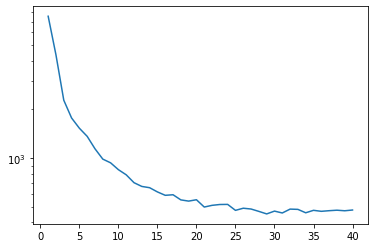

In [12]:
fig = plt.semilogy(np.arange(40)+1, Js)
plt.savefig("tmp.png")